#### data preprocessing

In [261]:
import pandas as pd
import seaborn as sb

# df = pd.read_csv('/Users/sachacollinson/Downloads/fake_transactional_data_24.csv')
# df_NonNumeric_Mapping = pd.read_excel('/Users/sachacollinson/Downloads/Location_value_pairs.xlsx')
df = pd.read_csv('/Users/thanaparleelasathapornkun/Library/Mobile Documents/com~apple~CloudDocs/Term2/dsmp-2024-group-30/fake_transactional_data_24.csv', encoding='utf-8')
df_NonNumeric_Mapping = pd.read_excel('/Users/thanaparleelasathapornkun/Library/Mobile Documents/com~apple~CloudDocs/Term2/dsmp-2024-group-30/Location_value_pairs.xlsx')
df_simulated_transaction_2024 = pd.read_csv("/Users/thanaparleelasathapornkun/Library/Mobile Documents/com~apple~CloudDocs/Term2/dsmp-2024-group-30/simulated_transaction_2024.csv", encoding='utf-8')

df = df.rename(columns={"from_totally_fake_account": "AccountNumber", "monopoly_money_amount": "MoneyTransferAmount", "to_randomly_generated_account": "TransferredLocationAccount", "not_happened_yet_date": "TransactionDate"})
# from_totally_fake_account  = AccountNumber
# monopoly_money_amount = MoneyTransferAmount
# to_randomly_generated_account = TransferredLocationAccount
# not_happened_yet_date = TransactionDate
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format="%d/%m/%Y").dt.date
df = df.sort_values(by=['TransactionDate'])

#non-numeric and numeric value
# df_Transferred_numeric = df[df['TransferredLocationAccount'].apply(lambda x: str(x).isnumeric())].copy()
# df_Transferred_Non_Numeric = df[df['TransferredLocationAccount'].apply(lambda x: str(x).isnumeric()==False)].copy()

#### 1 dataset

In [262]:
# Check for null values in each column
null_status = df.isnull().any()
# Show all columns along with their null or not-null status
print("Column\t\tNull Status")
for column, status in null_status.items():
    print(f"{column}\t\t{status}")

Column		Null Status
AccountNumber		False
MoneyTransferAmount		False
TransferredLocationAccount		False
TransactionDate		False


#### 2 dataset

#### Add numeric and non-numeric

In [263]:

import pandas as pd
import numpy as np

# Define the custom function to merge columns
def merge_columns(row):
    # Empty value is represented by an empty string or NaN
    account = row['Third Party Account No'] if pd.notnull(row['Third Party Account No']) and row['Third Party Account No'] != ''  else ''
    name = row['Third Party Name'] if pd.notnull(row['Third Party Name']) and row['Third Party Name'] != '' else ''

    # Combine the non-empty values, and might adjust the logic and separator
    if account and name:
        return f"{account} - {name}"
    else:
        return account or name
# print(df_simulated_transaction_2024)
# Apply the function across rows
df_simulated_transaction_2024['Merged Column'] = df_simulated_transaction_2024.apply(merge_columns, axis=1)


In [264]:
null_counts = df_simulated_transaction_2024.isnull().sum()
print(null_counts)

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
Merged Column                  0
dtype: int64


####  remove missing data
####  Merge columns

In [265]:
print(df_simulated_transaction_2024.columns)
selected_columns = [0, 1, 2,3,4, 7] 
df_simulated_transaction_2024_subset = df_simulated_transaction_2024.iloc[:,selected_columns]
# print(df_simulated_transaction_2024_subset)
df_simulated_transaction_2024_subset = df_simulated_transaction_2024_subset.dropna()
null_counts = df_simulated_transaction_2024_subset.isnull().sum()
print(null_counts)

Index(['Date', 'Timestamp', 'Account No', 'Balance', 'Amount',
       'Third Party Account No', 'Third Party Name', 'Merged Column'],
      dtype='object')
Date             0
Timestamp        0
Account No       0
Balance          0
Amount           0
Merged Column    0
dtype: int64


In [266]:
# df_simulated_transaction_2024['Column_type'] = df_simulated_transaction_2024.apply(lambda row: 'numeric' if pd.notnull(row['Third Party Account No']) and row['Third Party Account No'] != '' else 'non-numeric', axis=1)
# print(df_simulated_transaction_2024[df_simulated_transaction_2024['Column_type'] == None])

df_Transferred_Numeric = df_simulated_transaction_2024_subset[df_simulated_transaction_2024_subset['Merged Column'].apply(lambda x: isinstance(x, (int, float)) ==True )].copy()
df_Transferred_Non_Numeric = df_simulated_transaction_2024_subset[df_simulated_transaction_2024_subset['Merged Column'].apply(lambda x: isinstance(x, (str)) ==True)].copy()

In [267]:
# Separate the dataset into two based on the Amount
outgoing_payments = df_simulated_transaction_2024_subset[df_simulated_transaction_2024_subset['Amount'] < 0]
incoming_payments = df_simulated_transaction_2024_subset[df_simulated_transaction_2024_subset['Amount'] > 0]

# Display the first few rows of each dataset to confirm
(outgoing_payments.head(), incoming_payments.head())


(          Date Timestamp   Account No  Balance  Amount Merged Column
 2   01/01/2023     00:00  472213568.0   3012.0  -780.0   283027736.0
 7   01/01/2023     00:00  768271776.0   2840.0  -780.0   215404070.0
 11  01/01/2023     00:00  350921975.0   1998.5  -460.0   633362865.0
 13  01/01/2023     00:00  455831435.0   2603.1  -650.0   442079728.0
 18  01/01/2023     00:00  172084472.0   1149.0 -1300.0   407574996.0,
          Date Timestamp   Account No  Balance   Amount       Merged Column
 0  01/01/2023     00:00  678330503.0  2971.00  1584.00  Westport Care Home
 1  01/01/2023     00:00  472213568.0  3792.00  1950.00    Barbiee Boutique
 3  01/01/2023     00:00  283027736.0  1787.00   780.00         472213568.0
 4  01/01/2023     00:00  624500124.0  3226.00  1825.00            Fat Face
 5  01/01/2023     00:00  203466392.0  4607.66  2841.66    Lavender Primary)

In [268]:
# Add a new column showing the quarter for each date
df_simulated_transaction_2024_subset['Date'] = pd.to_datetime(df_simulated_transaction_2024_subset['Date'], format='%d/%m/%Y')
df_simulated_transaction_2024_subset['Date_quarter'] = df_simulated_transaction_2024_subset['Date'].dt.quarter

print(df_simulated_transaction_2024_subset)

             Date Timestamp   Account No       Balance   Amount  \
0      2023-01-01     00:00  678330503.0   2971.000000  1584.00   
1      2023-01-01     00:00  472213568.0   3792.000000  1950.00   
2      2023-01-01     00:00  472213568.0   3012.000000  -780.00   
3      2023-01-01     00:00  283027736.0   1787.000000   780.00   
4      2023-01-01     00:00  624500124.0   3226.000000  1825.00   
...           ...       ...          ...           ...      ...   
230591 2023-12-06     20:54  581655972.0  45935.206861   -41.06   
230592 2023-12-06     20:55  786141370.0   -244.837500   -62.35   
230593 2023-12-06     21:05  824916823.0   9709.172159   -32.94   
230594 2023-12-06     21:13  366550080.0  26834.165794   -19.25   
230595 2023-12-06     21:32  259015404.0   1145.349837   -37.64   

             Merged Column  Date_quarter  
0       Westport Care Home             1  
1         Barbiee Boutique             1  
2              283027736.0             1  
3              47221356

##### df_Transferred_Numeric
##### df_Transferred_Non_Numeric
##### outgoing_payments
##### incoming_payments


### EDA

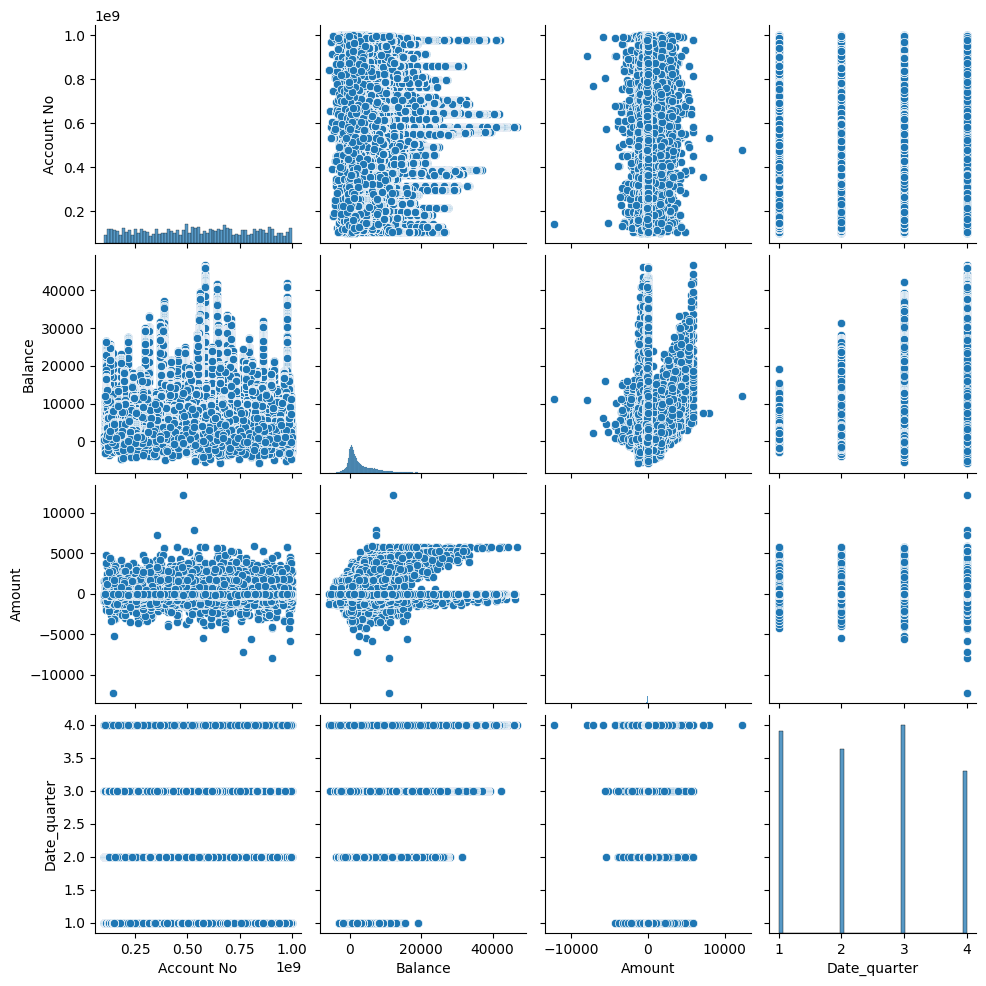

In [279]:
import seaborn as sns
sns.pairplot(data=df_simulated_transaction_2024_subset)

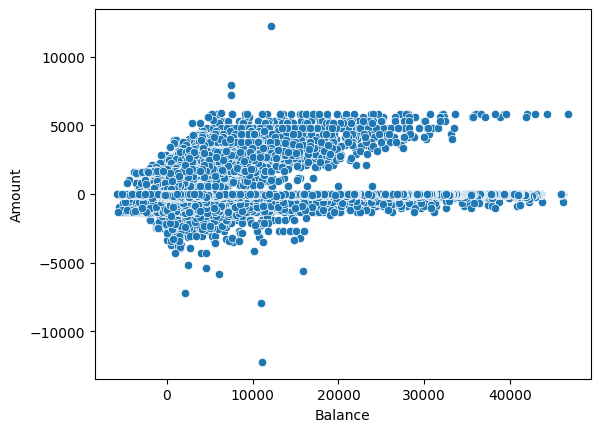

In [269]:
import seaborn as sns

import matplotlib.pyplot as plt

# Assuming df_simulated_transaction_2024_subset is your DataFrame and it contains "Balance" and "Amount"
sns.scatterplot(x="Balance", y="Amount", data=df_simulated_transaction_2024_subset)

# Show the plot
plt.show()

/Users/thanaparleelasathapornkun/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


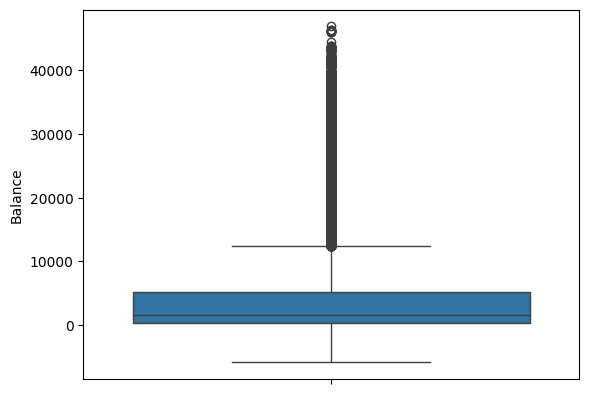

/Users/thanaparleelasathapornkun/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


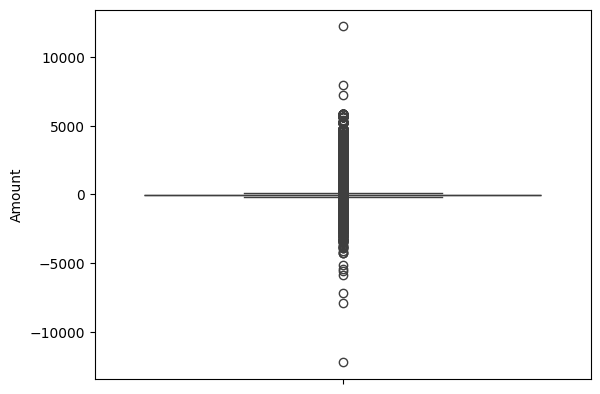

In [275]:
# Box plot for "Balance"
sns.boxplot(y="Balance", data=df_simulated_transaction_2024_subset)
plt.show()

# Box plot for "Amount"
sns.boxplot(y="Amount", data=df_simulated_transaction_2024_subset)
plt.show()

In [276]:
import pandas as pd

# Calculate Q1, Q3, and IQR for "Balance"
Q1_balance = df_simulated_transaction_2024_subset['Balance'].quantile(0.25)
Q3_balance = df_simulated_transaction_2024_subset['Balance'].quantile(0.75)
IQR_balance = Q3_balance - Q1_balance

# Calculate Q1, Q3, and IQR for "Amount"
Q1_amount = df_simulated_transaction_2024_subset['Amount'].quantile(0.25)
Q3_amount = df_simulated_transaction_2024_subset['Amount'].quantile(0.75)
IQR_amount = Q3_amount - Q1_amount

# Filter out outliers for "Balance"
df_filtered = df_simulated_transaction_2024_subset[
    ~((df_simulated_transaction_2024_subset['Balance'] < (Q1_balance - 1.5 * IQR_balance)) |
    (df_simulated_transaction_2024_subset['Balance'] > (Q3_balance + 1.5 * IQR_balance)))
]

# Filter out outliers for "Amount" from already filtered DataFrame
df_filtered = df_filtered[
    ~((df_filtered['Amount'] < (Q1_amount - 1.5 * IQR_amount)) |
    (df_filtered['Amount'] > (Q3_amount + 1.5 * IQR_amount)))
]


#### OLD

In [271]:
##First datasets
# AccountNumber		False
# MoneyTransferAmount		False
# TransferredLocationAccount		False
# TransactionDate		False

# No null value
# separate into numeric and non-numeric TransferredLocationAccount


##second datasets
# Date		True # 1 - 365 days ??? 
# Timestamp		True # separate into 4 cagtegories
# Account No		True
# Balance		True
# Amount		True
# Third Party Account No		True
# Third Party Name


In [272]:
# tmp = df_simulated_transaction_2024_subset[df_simulated_transaction_2024_subset['Column_type'] == 'non-numeric']
# print(len(tmp))
# print(len(df_simulated_transaction_2024_subset[df_simulated_transaction_2024_subset['Column_type'] == 'numeric']))
# print(len(df_Transferred_Numeric ))
# print(len(df_Transferred_Non_Numeric))

In [273]:
# df_simulated_transaction_2024

# import numpy as np
# print(df_simulated_transaction_2024.columns)
# # print(df_simulated_transaction_2024.value_counts) 
# print("total: "+str(len(df_simulated_transaction_2024)))
# Transferred_AccountNo_Null = df_simulated_transaction_2024[df_simulated_transaction_2024.isnull()['Third Party Account No'] == False]
# Transferred_Location_Null = df_simulated_transaction_2024[df_simulated_transaction_2024.isnull()['Third Party Name'] == False]
# Transferred_Both_AccNo_Location_Null = df_simulated_transaction_2024[(df_simulated_transaction_2024.isnull()['Third Party Account No'] == False) & (df_simulated_transaction_2024.isnull()['Third Party Name'] == False)]
# # Transferred_either_AccNo_Location_Null = df_simulated_transaction_2024[(df_simulated_transaction_2024.isnull()['Third Party Account No'] == False) | (df_simulated_transaction_2024.isnull()['Third Party Name'] == False)]
# print("Transferred_AccountNo_Null total: "+str(len(Transferred_AccountNo_Null)))
# print("Transferred_Location_Null total: "+str(len(Transferred_Location_Null)))
# print("Transferred_Both_AccNo_Location_Null total: "+str(len(Transferred_Both_AccNo_Location_Null)))
# # print("Transferred_either_AccNo_Location_Null total: "+str(len(Transferred_either_AccNo_Location_Null)))
# print(Transferred_AccountNo_Null.head())
# # 230,349
 


In [274]:
# df_simulated_transaction_2024['Column_type'] = df_simulated_transaction_2024.apply(lambda row: 'numeric' if pd.notnull(row['Third Party Account No']) and row['Third Party Account No'] != '' else 'non-numeric', axis=1)
# print(df_simulated_transaction_2024[df_simulated_transaction_2024['Column_type'] == None])

# df_Transferred_numeric = df_simulated_transaction_2024[df_simulated_transaction_2024['Third Party Account No'].apply(lambda x: str(x).isnumeric())].copy()
# df_Transferred_Non_Numeric = df_simulated_transaction_2024[df_simulated_transaction_2024['TransferredLocationAccount'].apply(lambda x: str(x).isnumeric()==False)].copy()
